<a href="https://colab.research.google.com/github/Serarrs/dap-2024/blob/main/les07/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
<br>
**«БЕЛГОРОДСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ
ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ»
<br>
(НИУ «БелГУ»)**
<br><br>
ИНСТИТУТ ИНЖЕНЕРНЫХ И ЦИФРОВЫХ ТЕХНОЛОГИЙ
<br><br>
**Кафедра информационных и робототехнических систем**
<br><br><br><br>
**ОТЧЕТ**
<br>
по лабораторной работе №7
<br>
на тему: «Классификация»
<br>
по дисциплине
<br>
«Анализ данных на Python»
<br>
студента очной формы обучения
<br>
направления подготовки
<br><br><br>
09.03.02 – Информационные системы и технологии
<br>
3 курса группы 12002208
<br>
Кузьмина Анатолия Витальевича

<br><br><br><br><div>
<div align="right">

Проверил:
<br>
ДВОПУ
<br>
Чеботарев С. А.
<div><br><br><br>
<div align="center">

Белгород 2025
<div>
___________

<div align="center">

<br>Ход работы<br>

Задача. Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0

Первые 7 строк:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    ma

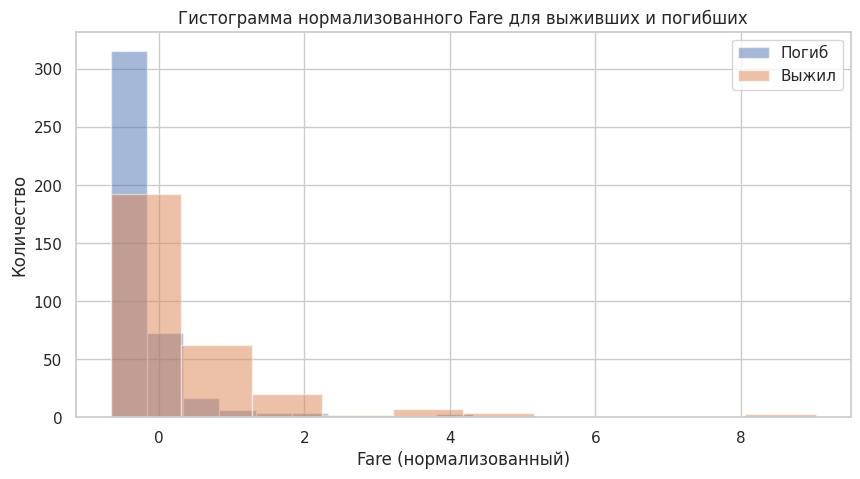


Матрица ошибок:
[[90 17]
 [26 46]]

Accuracy модели: 0.76

Вывод:
После кодирования категориальных признаков модель успешно обучена.
Точность модели может быть улучшена с помощью подбора признаков и других алгоритмов.


In [76]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
# Извлечение данных
# 1.Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".
url = "https://raw.githubusercontent.com/chebotarevsa/dap-2024/refs/heads/main/les07/data/titanic.csv"
df = pd.read_csv(url, index_col="PassengerId")
# 2.Выведете первые 7 строк набора.
print("\nПервые 7 строк:")
print(df.head(7))

# Подготовка данных
# 3.Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
print("\nИнформация о датасете:")
df.info()
print("\nПропущенные значения по столбцам:")
print(df.isnull().sum())

# 4.Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.
df = df.drop(columns=["Name", "Ticket", "Cabin"])

# 5.Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.
df["male"] = (df["Sex"] == "male").astype(int)
df["female"] = (df["Sex"] == "female").astype(int)
df = df.drop(columns=["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# 6.Удалите строки, которые содержать хотя бы одно null значение.
df = df.dropna()

# Исследование данных
# 4.Нормализуйте значения признака "Fare".
df["Fare"] = (df["Fare"] - df["Fare"].mean()) / df["Fare"].std()

# 5.Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.
fare_survived = df[df["Survived"] == 1]["Fare"].mean()
fare_died = df[df["Survived"] == 0]["Fare"].mean()
print(f"\nРазница между средними Fare (выжившие - погибшие): {fare_survived - fare_died:.2f}")

# 6.Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.
plt.figure(figsize=(10, 5))
df[df["Survived"] == 0]["Fare"].hist(alpha=0.5, label="Погиб")
df[df["Survived"] == 1]["Fare"].hist(alpha=0.5, label="Выжил")
plt.legend()
plt.title("Гистограмма нормализованного Fare для выживших и погибших")
plt.xlabel("Fare (нормализованный)")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

# 7.Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Предсказательная модель
# 8.Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# 9.Выполните обучение модели.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Проверка модели
# 10.Выведите мартицу ошибок
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)
# 11.Расчитайте accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy модели: {acc:.2f}")

# 12.Сделайте вывод о полученном результате
print("\nВывод:")
print("После кодирования категориальных признаков модель успешно обучена.")
print("Точность модели может быть улучшена с помощью подбора признаков и других алгоритмов.")
